# 🚀 Generative AI for Developers (Python)
`Author: Arafat Tehsin`

Well, well, well, looks like we have a language polyglot in the making! And not just any polyglot, but one who's delving into the fascinating world of Azure OpenAI Service. Get ready to unleash your inner coding genius as we take you on a journey from GPT-3 Text Completions to ChatGPT (yes, we're getting chatty here!) and even sprinkle in some DALL-E for good measure. Buckle up, folks, because we're about to turn up the AI heat!

---

```
Inspired by the great designers at the Microsoft OCTO (Semantic Kernel)
```
### Reminder: This 📘 `Polyglot` notebook needs to be run from VS Code with below pre-requisites. 

The following software needs to be installed on your computer:

* ✅ [Visual Studio Code](https://code.visualstudio.com/Download)
* ✅ [Python 3.9](https://code.visualstudio.com/docs/languages/python) 
* ✅ [Polyglot Notebooks for VS Code](https://marketplace.visualstudio.com/items?itemName=ms-dotnettools.dotnet-interactive-vscode?)

When the three items above are installed, the code notebooks should be formatted nicely with code blocks that have a little ▶️ (play) button next to them when you hover over the code. The "Polyglot Notebooks for VS Code" extension is what lets you run all the code snippets from within VS Code and serves as a little playground for your initial Azure OpenAI learning.

Apart from installing software, you will need to have an API key to access the OpenAI models. 

* ✅ [Azure OpenAI Service](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/quickstart?WT.mc_id=AI-MVP-5003464). Access your API key on Azure Open AI Service with [these instructions](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/reference?WT.mc_id=AI-MVP-5003464).

This notebook also requires you to create a deployment of [models](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/concepts/models?WT.mc_id=AI-MVP-5003464) 🧪. This means that your fresh Azure OpenAI Service won't have any model right now. 
* ✅ You can create your deployments from [these docs](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal&WT.mc_id=AI-MVP-5003464). The suggestion is to have below deployments:

    - `text-davinci-003` - davinci
    - `gpt-35-turbo` - ChatGPT-Business
    -  `gpt-4`- GPT-4



### 🌱 Environment Variables

Once you get the key and enpoint, you may want to setup from command line or the shiny [Windows Terminal](https://aka.ms/windowsterminal)

* `setx OPEN_AI_KEY "your_key_here"`
* `setx OPEN_AI_ENDPOINT "your_enpoint_here"`

#### 📘 After you have achieved all the 👆 prerequisites, open the notebooks in this repo from within Visual Studio Code and you are ready to to go!
---

### Now, let's try this out

👋 In the event that you hit "play" below on the code block and it asks you to:
 
```
Select kernel for <filename>
----
Python 3.9.x 👈
Select Another Kernel...
----
```

Choose `Python 3.9.x` and you're good to go. That selection lets you magically run the Generative AI notebooks.

In [2]:
print("Microphone test. Check one. Two. Three.")

Microphone test. Check one. Two. Three.


## Get a 🔥 Python kernel ready for you to load the Azure OpenAI Service package

This will create a client so you don't have to initialise it again. You can read more about the [Azure OpenAI Library](https://pypi.org/project/openai/) here.

In [27]:
%pip install openai

import os
import requests
import json
import openai

openai.api_key = os.getenv("OPEN_AI_KEY")
openai.api_base = os.getenv("OPEN_AI_ENDPOINT")
openai.api_type = 'azure'
openai.api_version = '2023-05-15'  # this may change in the future

# setting constant for models
davinci = "davinci"
chatgpt = "ChatGPT-Business"
gpt4 = "GPT-4"


Note: you may need to restart the kernel to use updated packages.


`Note: you may need to restart the kernel to use updated packages.`

## 📑 Let's talk about completion with GPT-3

Completions can be used for variety of tasks. It's a simple but powerful text-in and text-out interface. 

In this snippet, we will be setting up our respective engine for GPT-3 which is `davinci` and also a `prompt` which we want to see completed by GPT-3 model.

Upon providing your input as a prompt, the model will generate a text completion that attempts to match whatever context or pattern you gave it. For example, if you a prompt, "
All that glitters is", it will return the completion " not gold" with high probability.

💡 Read more about the Completions [here](https://learn.microsoft.com/azure/cognitive-services/openai/how-to/completions?WT.mc_id=AI-MVP-5003464).

In [10]:
customPrompt = "I climbed a mango tree and picked a "
print(f"Your input: {customPrompt}")

response = openai.Completion.create(
    engine=davinci, prompt=customPrompt, max_tokens=100)
text = response['choices'][0]['text'].replace(
    '\n', '').replace(' .', '.').strip()
print(f"GPT-3 Response (Chat): {text}")


Your input: I climbed a mango tree and picked a 
GPT-3 Response (Chat): mango!


## 📈 Sentiment Classifier with Completion API

In this example, we provide some sample utterances (past records) to augment the model according to our needs. These examples are a few and hence a good example for few-shot learning within Prompt Engineering.

In [8]:
customPrompt = """
This is a tweet sentiment classifier

Tweet: "I loved the new Batman movie!"
Sentiment: Positive

Tweet: "I hate it when my phone battery dies." 
Sentiment: Negative

Tweet: "My day has been 👍"
Sentiment: Positive

Tweet: "This is the link to the article"
Sentiment: Neutral

Tweet: "I just don't like this movie."
Sentiment: 
"""
print(f"Your input: {customPrompt}")

response = openai.Completion.create(
    engine=davinci, prompt=customPrompt, max_tokens=100)
text = response['choices'][0]['text'].replace(
    '\n', '').replace(' .', '.').strip()
print(f"GPT-3 Response (Chat): {text}")


Your input: 
This is a tweet sentiment classifier

Tweet: "I loved the new Batman movie!"
Sentiment: Positive

Tweet: "I hate it when my phone battery dies." 
Sentiment: Negative

Tweet: "My day has been 👍"
Sentiment: Positive

Tweet: "This is the link to the article"
Sentiment: Neutral

Tweet: "I just don't like this movie."
Sentiment: 

GPT-3 Response (Chat): Negative


## 💬 ChatGPT & GPT-4

Previous models were text-in and text-out, meaning they accepted a prompt string and returned a completion to append to the prompt. However, the ChatGPT and GPT-4 models are conversation-in and message-out. The models expect input formatted in a specific chat-like transcript format, and return a completion that represents a model-written message in the chat. 

In this case, we're trying to build a flight tracker with the few-shot examples. 

* ✅ System message, the first one with `"role": "system"` key is a base for your conversational experience. Try to write as much as you want within it. 
* ✅ Also, the subsequent messages with are the few shots. `"role": "user"` defines what user may say whereas `"role": "assistant"` responds back with the probable answer.

You can also use the similar approach to build other use-cases. 

💡 Learn more about the ChatGPT & GPT-4 models [here](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/chatgpt?pivots=programming-language-chat-completions&WT.mc_id=AI-MVP-5003464).

In [15]:
customPrompt = "I want to track flight JF-123 flying from Sydney to Melbourne"
response = openai.ChatCompletion.create(
    engine=chatgpt,  # engine = "deployment_name".
    messages=[
        {"role": "system",
            "content": "You are a virtual flight assistant who is responsible for tracking flights. You need either a flight number or source (to) and destination (from) to track any flight. If user does not provide either of this information then you should ask for it. Anything outside of the flights are not a part of your scope and you should just answer with an Unknown intent"},
        {"role": "user", "content": "Track my flight from Sydney?"},
        {"role": "assistant",
            "content": "Sure! Please provide your destination?"},
        {"role": "user", "content": "I want to track flight JF-123?"},
        {"role": "assistant", "content": "Your flight JF-123 is now departed from Sydney and will be arriving soon in Melbourne at 7 PM"},
        {"role": "user", "content": customPrompt}
    ]
)

print(response['choices'][0]['message']['content'])


{
  "id": "chatcmpl-7a0vCra27s59weEHAjnleM2LPk6na",
  "object": "chat.completion",
  "created": 1688817706,
  "model": "gpt-35-turbo",
  "usage": {
    "prompt_tokens": 163,
    "completion_tokens": 23,
    "total_tokens": 186
  },
  "choices": [
    {
      "message": {
        "role": "assistant",
        "content": "Your flight JF-123 is now departed from Sydney and will be arriving soon in Melbourne at 7 PM."
      },
      "finish_reason": "stop",
      "index": 0
    }
  ]
}
Your flight JF-123 is now departed from Sydney and will be arriving soon in Melbourne at 7 PM.


`🔔 You will be able to look at the multi-turn chat application and that too with voice, very soon in this repo.`

## 🧠 Summarise and Translate 

While this format was designed specifically for multi-turn conversations, you'll find it can also work well for non-chat scenarios too.

In [22]:
textToSummarizeAndTranslate = f"""
As you know, Microsoft’s AI Builder now supports prebuilt Azure OpenAI models, allowing users to easily integrate powerful AI capabilities into their applications and processes without the need for any coding or data science expertise. In this post, we will explore the benefits and potential use cases of leveraging these prebuilt models with AI Builder.

Microsoft’s AI Builder simplifies the integration of Azure OpenAI models by providing a user-friendly interface for connecting to the OpenAI API. This enables users to access advanced AI capabilities, such as GPT and incorporate them into their applications and workflows with minimal effort. By utilizing prebuilt Azure OpenAI models, users can add powerful AI-driven features to their applications and processes, such as natural language processing, text generation, and more. This can lead to improved efficiency, better decision-making, and more personalized user experiences.

Helpful conversational experiences with Power Virtual Agents
These latest capabilities of Azure OpenAI in AI Builder are native to Power Automate and Power Apps. This basically means that anything in Power Platform can utilise the capabilities of the GPT models without going to external sources. As a result of that, I created a Power Virutal Agents(PVA) bot using the unified authoring canvas which calls a Power Automate flow to get the answers from Azure OpenAI‘s GPT model."""

summarizationPrompt = f"""
Summarize the following text for a 140 character tweet and translate it into Urdu.

Text: {textToSummarizeAndTranslate}

    Summary:
"""

response = openai.ChatCompletion.create(
    engine=chatgpt,
    messages=[
        {"role": "system",
            "content": "You're an AI Virtual Assistant responsible for the summarisation and translating the text."},
        {"role": "user", "content": summarizationPrompt}
    ]
)

print(response['choices'][0]['message']['content'])


Microsoft's AI Builder supports prebuilt Azure OpenAI models for easy integration of AI capabilities into applications without coding. With natural language processing and text generation, users can improve efficiency, decision-making and personalized user experiences.

Translation in Urdu:
جیسا کہ آپ جانتے ہیں کہ مائیکروسافٹ کا اے آئی بلڈر پری بلٹ ازور اوپن اے ایف کے ماڈلز کو سپورٹ کرتا ہے جو استعمال کرنے والوں کو ایپلیکیشن اور پروسیس میں مضبوط اے آئی کے قابلیتوں کو آسانی سے شامل کرنے دیتا ہے۔ #Microsoft #AIBuilder #AzureOpenAI #naturallanguageprocessing #textgeneration


## 🖼️ Generate an image with DALL-E 2

The image generation API creates an image from a text prompt. It does not edit existing images or create variations. 

#### 🛖 But first, a little housekeeping

You may notice a long piece of code and it has a couple of reasons:

* ⚠️ The Azure.OpenAI Library does not have a support for DALL-E yet.
* 🫰 In order to show you an image on this Notebook, there's a way which moved Qasim   



#### 🎨 Change the prompt and see the magic! 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


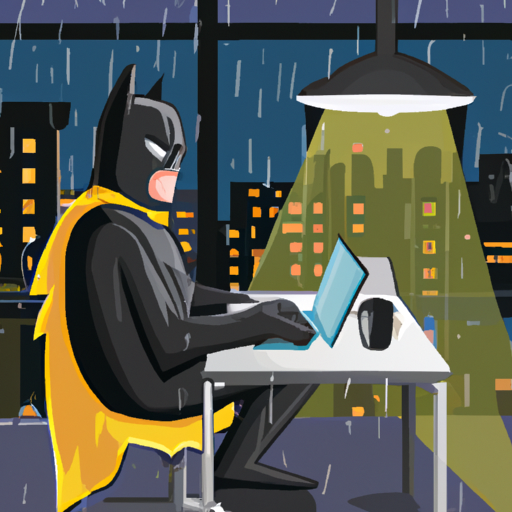

In [30]:
%pip install requests
%pip install pillow

import requests
from PIL import Image

# At the moment Dall-E is only supported by the 2023-06-01-preview API version
openai.api_version = '2023-06-01-preview'

# Create an image using the image generation API
generation_response = openai.Image.create(
    prompt='Batman working from home in a rainy season',
    size='512x512',
    n=2
)

# Set the directory where we'll store the image
image_dir = os.path.join(os.curdir, 'images')
# If the directory doesn't exist, create it
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# With the directory in place, we can initialize the image path (note that filetype should be png)
image_path = os.path.join(image_dir, 'generated_image.png')

# Now we can retrieve the generated image
# extract image URL from response
image_url = generation_response["data"][0]["url"]
generated_image = requests.get(image_url).content  # download the image
with open(image_path, "wb") as image_file:
    image_file.write(generated_image)

# Display the image in the default image viewer
display(Image.open(image_path))
